In [ ]:
# Mengimpor numpy untuk operasi numerik
import numpy as np

# Mengimpor matplotlib.pyplot untuk plotting
import matplotlib.pyplot as plt

# Mengimpor modul math untuk fungsi matematika tambahan
import math,copy

# Cost Function

In [ ]:
def compute_cost(x,y,w,b):
  m=x.shape[0]
  cost_sum = 0
  for i in range(m):
    f_wb= w * x[i] + b
    cost = (f_wb - y[i])**2
    cost_sum = cost_sum + cost
  total_cost = (1/(2*m))*cost_sum

  return total_cost

# Gradient Descent

In [ ]:
x_train = np.array([1.0, 2.0, 4.0])
y_train = np.array([300.0, 500.0, 800.0])

<function matplotlib.pyplot.show(close=None, block=None)>

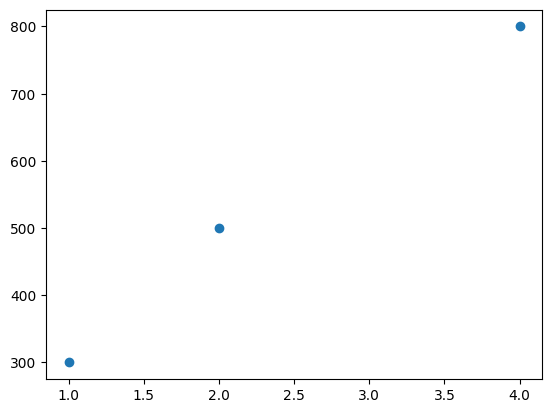

In [ ]:
plt.scatter(x_train,y_train)
plt.show

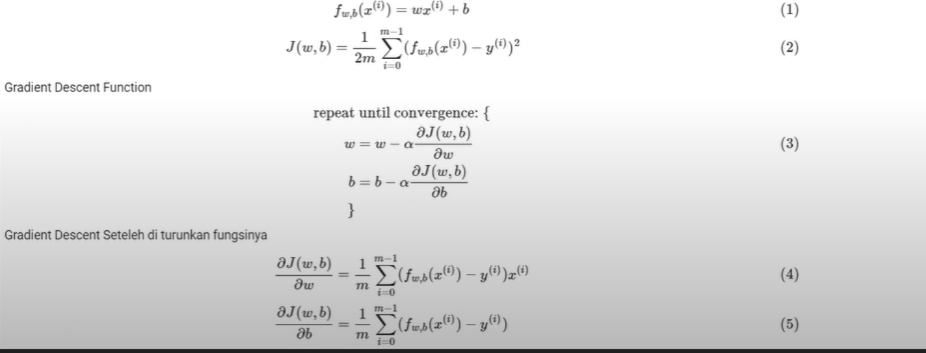

In [ ]:
def compute_gradient(x, y, w, b):
    # Jumlah contoh pelatihan
    m = x.shape[0]

    # Inisialisasi gradien terhadap w dan b
    dj_dw = 0
    dj_db = 0

    # Iterasi melalui setiap contoh pelatihan
    for i in range(m):
        # Menghitung nilai prediksi menggunakan model
        f_wb = w * x[i] + b

        # Menghitung gradien terhadap w dan b untuk contoh pelatihan ke-i
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]

        # Menambahkan gradien dari contoh pelatihan ke-i ke gradien total
        dj_db += dj_db_i
        dj_dw += dj_dw_i

    # Menghitung rata-rata gradien
    dj_dw /= m
    dj_db /= m

    # Mengembalikan gradien terhadap w dan b
    return dj_dw, dj_db

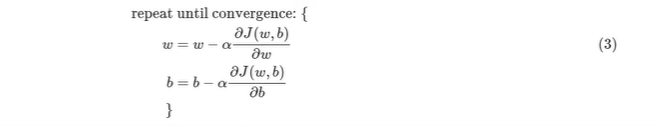

In [ ]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    # Melakukan deep copy untuk menghindari perubahan pada parameter asli
    w = copy.deepcopy(w_in)
    b = b_in

    # Inisialisasi list untuk menyimpan riwayat nilai biaya dan parameter
    # Menyimpan nilai cost function
    J_history = []
    # Menyimpan Value
    p_history = []

    # Iterasi sebanyak num_iters
    for i in range(num_iters):
        # Menghitung gradien menggunakan fungsi gradien yang diberikan
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # Memperbarui parameter w dan b menggunakan gradien turun
        w -= alpha * dj_dw
        b -= alpha * dj_db

        # Menyimpan nilai biaya dan parameter setiap 100000 iterasi
        if i < 100000:
            J_history.append(cost_function(x, y, w, b))
            p_history.append([w, b])

        # Menampilkan status setiap 10% iterasi
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e}",
                  f"dj_dw: {dj_dw:0.3e}, dj_db: {dj_db: 0.3e}",
                  f"w: {w: 0.3e}, b: {b:0.5e}")

    # Mengembalikan parameter terbaru, riwayat biaya, dan riwayat parameter
    return w, b, J_history, p_history

In [ ]:
# Inisialisasi nilai awal untuk parameter w dan b
w_init = 0
b_init = 0

# Jumlah iterasi yang akan dilakukan
iterations = 10000

# Ukuran langkah (learning rate)
tmp_alpha = 1.0e-2

# Melakukan gradien turun untuk menemukan parameter optimal
w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

# Menampilkan parameter terakhir yang ditemukan
print(f"(w, b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration    0: Cost 1.39e+05 dj_dw: -1.500e+03, dj_db: -5.333e+02 w:  1.500e+01, b: 5.33333e+00
Iteration 1000: Cost 1.33e+02 dj_dw: 7.787e-01, dj_db: -2.270e+00 w:  1.682e+02, b: 1.38642e+02
Iteration 2000: Cost 1.19e+02 dj_dw: 1.058e-01, dj_db: -3.083e-01 w:  1.648e+02, b: 1.48457e+02
Iteration 3000: Cost 1.19e+02 dj_dw: 1.437e-02, dj_db: -4.189e-02 w:  1.644e+02, b: 1.49790e+02
Iteration 4000: Cost 1.19e+02 dj_dw: 1.953e-03, dj_db: -5.691e-03 w:  1.643e+02, b: 1.49972e+02
Iteration 5000: Cost 1.19e+02 dj_dw: 2.653e-04, dj_db: -7.732e-04 w:  1.643e+02, b: 1.49996e+02
Iteration 6000: Cost 1.19e+02 dj_dw: 3.604e-05, dj_db: -1.050e-04 w:  1.643e+02, b: 1.49999e+02
Iteration 7000: Cost 1.19e+02 dj_dw: 4.896e-06, dj_db: -1.427e-05 w:  1.643e+02, b: 1.50000e+02
Iteration 8000: Cost 1.19e+02 dj_dw: 6.652e-07, dj_db: -1.939e-06 w:  1.643e+02, b: 1.50000e+02
Iteration 9000: Cost 1.19e+02 dj_dw: 9.038e-08, dj_db: -2.634e-07 w:  1.643e+02, b: 1.50000e+02
(w, b) found by gradient descent: (164.